# K-MEANS - TELECOM CUSTOMER CHURN

Lets import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data = pd.read_excel('Telco_customer_churn (1).xlsx')
data.head()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


Lets explore our dataset

In [3]:
df = data.copy()

In [4]:
df.shape

(7043, 30)

<AxesSubplot:>

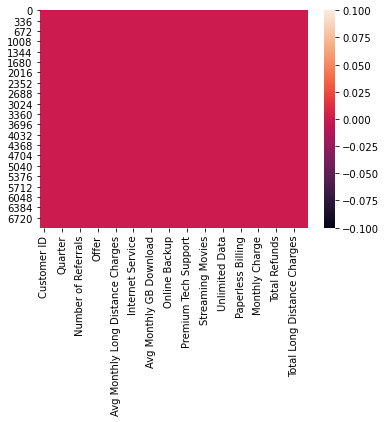

In [5]:
sns.heatmap(df.isnull())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Quarter                            7043 non-null   object 
 3   Referred a Friend                  7043 non-null   object 
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              7043 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      7043 non-null   objec

In [9]:
df.describe()

,Count,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,0.0,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,1.0,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,1.0,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,1.0,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,1.0,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,1.0,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [10]:
df.duplicated().sum()

0

We can drop Customer ID, Count, Quarter columns from the data frame

In [11]:
df.columns

Index(['Customer ID', 'Count', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

In [12]:
colums_to_drop = ['Customer ID', 'Count', 'Quarter']
df = df.drop(columns=colums_to_drop)
df.shape

(7043, 27)

We have lots of columns where data is in Yes or No, lets transform our columns with Yes and No to 1 and 0

In [13]:
df = df.replace(to_replace={'Yes':1, 'No': 0})
df.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,0,0,1,None,0,0.00,0,1,DSL,8,...,0,Month-to-Month,1,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,1,1,8,Offer E,1,48.85,1,1,Fiber Optic,17,...,1,Month-to-Month,1,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,0,0,18,Offer D,1,11.33,1,1,Fiber Optic,52,...,1,Month-to-Month,1,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,1,1,25,Offer C,1,19.76,0,1,Fiber Optic,12,...,1,Month-to-Month,1,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,1,1,37,Offer C,1,6.33,1,1,Fiber Optic,14,...,1,Month-to-Month,1,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [14]:
df.describe(include='all')

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043.000000,...,7043.000000,7043,7043.000000,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
unique,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,4,NaN,...,NaN,3,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,Fiber Optic,NaN,...,NaN,Month-to-Month,NaN,Bank Withdrawal,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,3877,NaN,NaN,NaN,NaN,3035,NaN,...,NaN,3610,NaN,3909,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.457476,1.951867,32.386767,NaN,0.903166,22.958954,0.421837,0.783331,NaN,20.515405,...,0.673719,NaN,0.592219,NaN,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,0.498224,3.001199,24.542061,NaN,0.295752,15.448113,0.493888,0.412004,NaN,20.418940,...,0.468885,NaN,0.491457,NaN,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,0.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,...,0.000000,NaN,0.000000,NaN,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,0.000000,0.000000,9.000000,NaN,1.000000,9.210000,0.000000,1.000000,NaN,3.000000,...,0.000000,NaN,0.000000,NaN,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,0.000000,0.000000,29.000000,NaN,1.000000,22.890000,0.000000,1.000000,NaN,17.000000,...,1.000000,NaN,1.000000,NaN,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,1.000000,3.000000,55.000000,NaN,1.000000,36.395000,1.000000,1.000000,NaN,27.000000,...,1.000000,NaN,1.000000,NaN,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000


There are other columns which has more then 2 categories, for these columns we will use get dummies logic

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
df = pd.get_dummies(df, columns=['Offer', 'Internet Type', 'Contract','Payment Method'])
df.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
0,0,0,1,0,0.00,0,1,8,0,0,...,0,1,0,0,1,0,0,1,0,0
1,1,1,8,1,48.85,1,1,17,0,1,...,0,0,1,0,1,0,0,0,1,0
2,0,0,18,1,11.33,1,1,52,0,0,...,0,0,1,0,1,0,0,1,0,0
3,1,1,25,1,19.76,0,1,12,0,1,...,0,0,1,0,1,0,0,1,0,0
4,1,1,37,1,6.33,1,1,14,0,0,...,0,0,1,0,1,0,0,1,0,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  7043 non-null   int64  
 1   Number of Referrals                7043 non-null   int64  
 2   Tenure in Months                   7043 non-null   int64  
 3   Phone Service                      7043 non-null   int64  
 4   Avg Monthly Long Distance Charges  7043 non-null   float64
 5   Multiple Lines                     7043 non-null   int64  
 6   Internet Service                   7043 non-null   int64  
 7   Avg Monthly GB Download            7043 non-null   int64  
 8   Online Security                    7043 non-null   int64  
 9   Online Backup                      7043 non-null   int64  
 10  Device Protection Plan             7043 non-null   int64  
 11  Premium Tech Support               7043 non-null   int64

<AxesSubplot:>

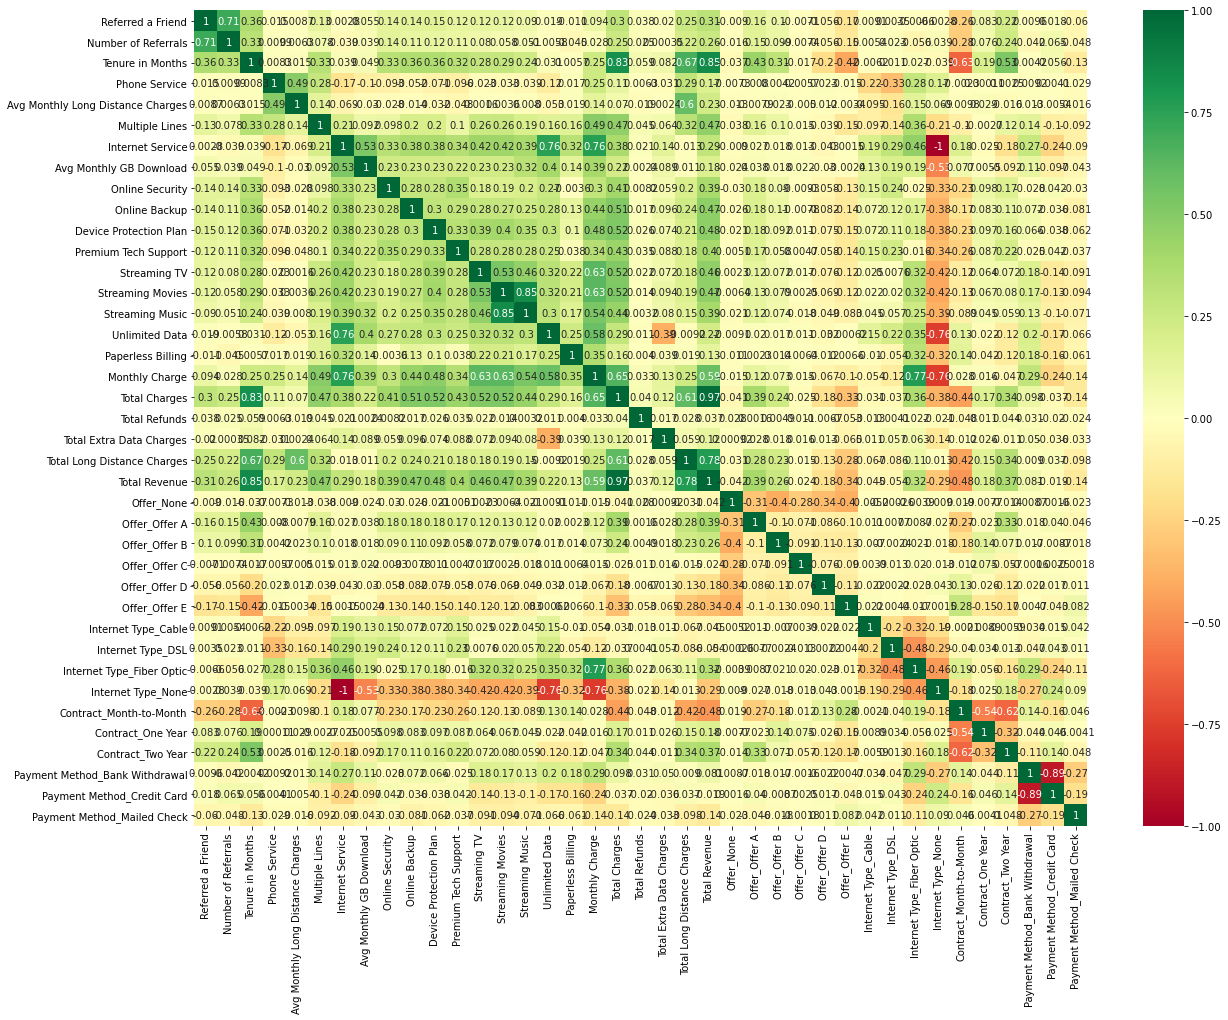

In [18]:
plt.rcParams['figure.figsize'] = (20,15)
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

Converting all columns as int64

In [20]:
df = df.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Referred a Friend                  7043 non-null   int32
 1   Number of Referrals                7043 non-null   int32
 2   Tenure in Months                   7043 non-null   int32
 3   Phone Service                      7043 non-null   int32
 4   Avg Monthly Long Distance Charges  7043 non-null   int32
 5   Multiple Lines                     7043 non-null   int32
 6   Internet Service                   7043 non-null   int32
 7   Avg Monthly GB Download            7043 non-null   int32
 8   Online Security                    7043 non-null   int32
 9   Online Backup                      7043 non-null   int32
 10  Device Protection Plan             7043 non-null   int32
 11  Premium Tech Support               7043 non-null   int32
 12  Streaming TV        

Lets look for outliers in our dataset

In [21]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
outliers.sum()

Referred a Friend                       0
Number of Referrals                   676
Tenure in Months                        0
Phone Service                         682
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                     1526
Avg Monthly GB Download               362
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Paperless Billing                       0
Monthly Charge                          0
Total Charges                           0
Total Refunds                         525
Total Extra Data Charges              728
Total Long Distance Charges           196
Total Revenue                          21
Offer_None                        

Lets normalize our data

In [22]:
def norm_func(i):
    x = (i-i.min()) / (i.max()- i.min())
    return(x)
norm = df.copy()

df_norm = norm_func(norm)
df_norm.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
0,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.094118,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.090909,0.098592,1.0,0.979592,1.0,1.0,0.200000,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.000000,0.239437,1.0,0.224490,1.0,1.0,0.611765,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.090909,0.338028,1.0,0.387755,0.0,1.0,0.141176,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.090909,0.507042,1.0,0.122449,1.0,1.0,0.164706,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


<AxesSubplot:ylabel='Density'>

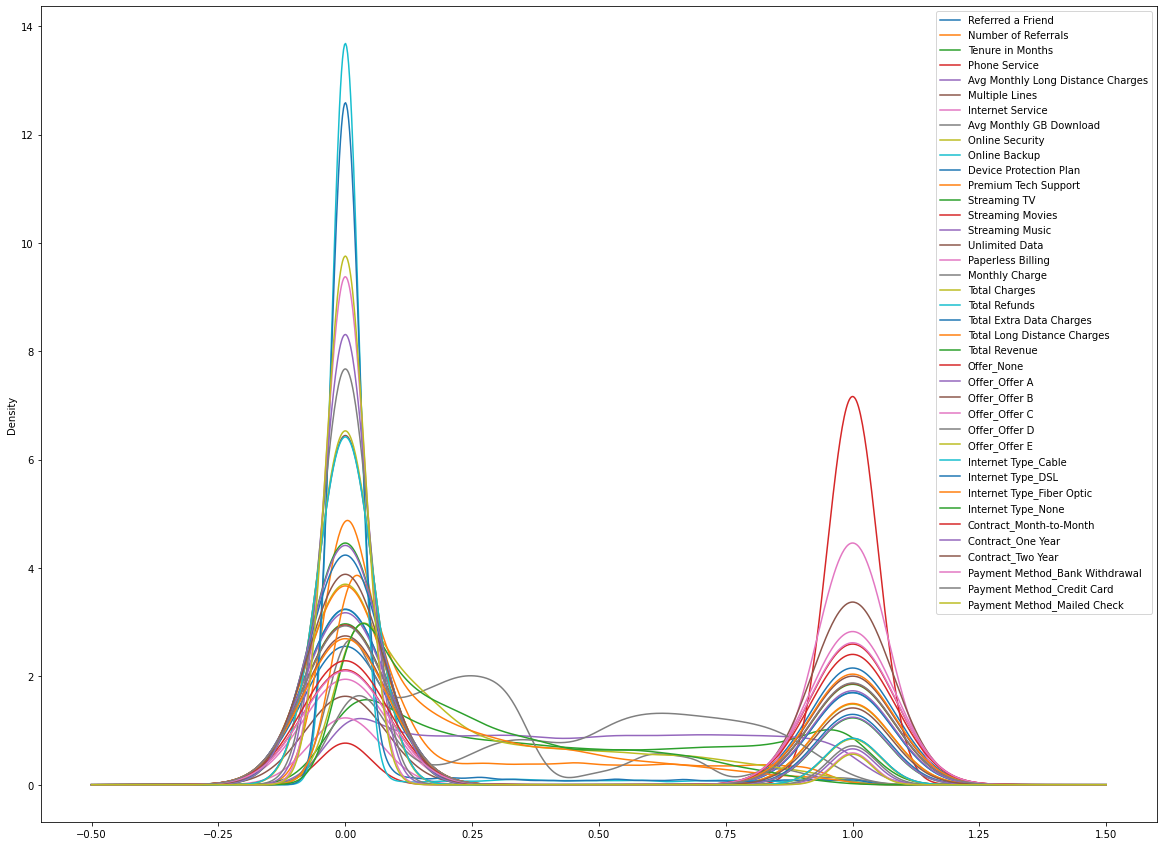

In [23]:
df_norm.plot(kind='kde')

Lets Create Elbow or Skree Plot

Text(0, 0.5, 'Total Within SS')

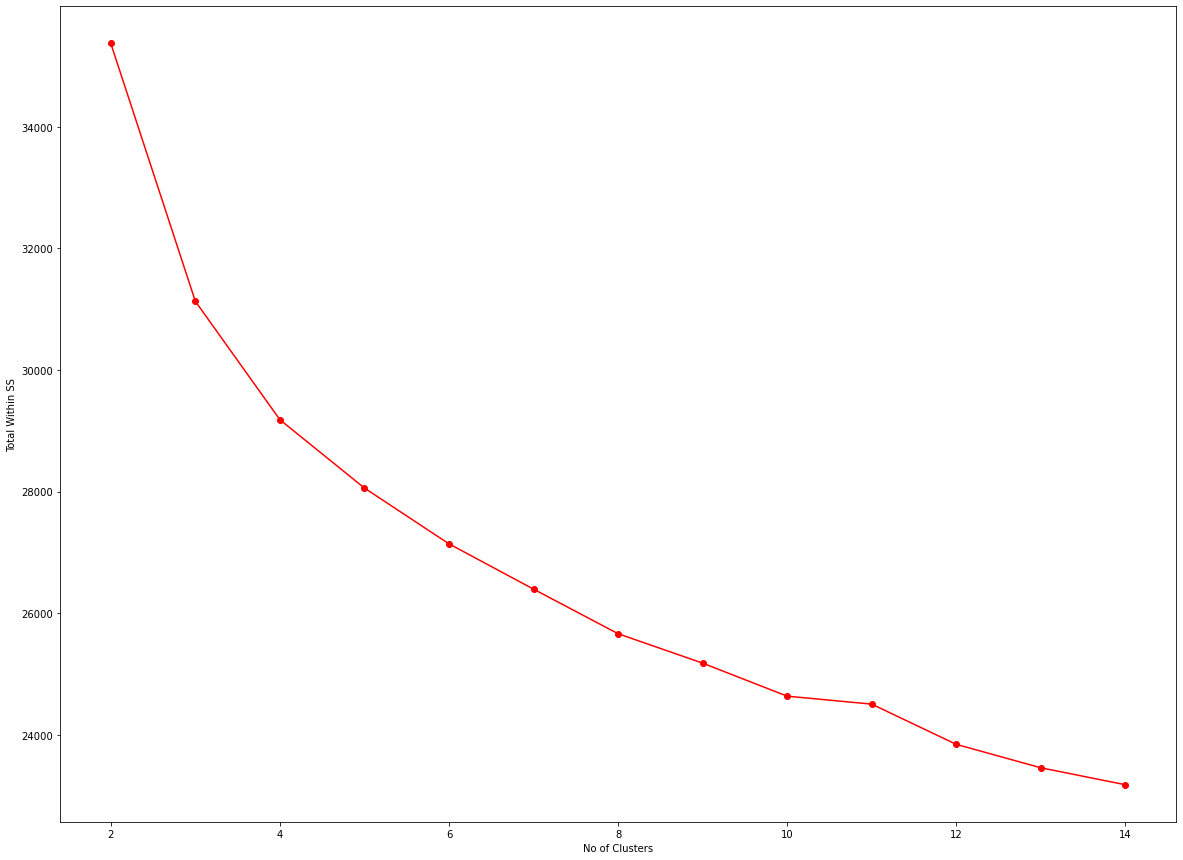

In [24]:
TWSS = []
k=list(range(2,15))

for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)
    
plt.plot(k,TWSS, 'ro-');plt.xlabel("No of Clusters");plt.ylabel('Total Within SS')

In [25]:
from kneed import KneeLocator

In [26]:
kl = KneeLocator(range(2,15), TWSS, curve='convex', direction='decreasing')
kl.elbow

5

Based on Elbow Curve and Knee Locator, ncluster = 5

In [27]:
model = KMeans(n_clusters=5)
model.fit(df_norm)
model.labels_
md = pd.Series(model.labels_)
df['Clust'] = md
df.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check,Clust
0,0,0,1,0,0,0,1,8,0,0,...,1,0,0,1,0,0,1,0,0,2
1,1,1,8,1,48,1,1,17,0,1,...,0,1,0,1,0,0,0,1,0,4
2,0,0,18,1,11,1,1,52,0,0,...,0,1,0,1,0,0,1,0,0,4
3,1,1,25,1,19,0,1,12,0,1,...,0,1,0,1,0,0,1,0,0,4
4,1,1,37,1,6,1,1,14,0,0,...,0,1,0,1,0,0,1,0,0,4


In [28]:
cluster = df.iloc[:,:-1].groupby(df.Clust).mean()
cluster

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
Clust,,,,,,,,,,,,,,,,,,,,,
0,0.669031,2.906225,56.007092,1.000000,25.399527,0.802206,1.000000,26.754925,0.453113,0.691095,...,0.013396,0.001576,0.985028,0.000000,0.200946,0.414500,0.384555,0.676123,0.310481,0.013396
1,0.669611,3.215548,51.925795,0.766784,19.674028,0.425795,1.000000,28.132509,0.708481,0.633392,...,0.320671,0.668728,0.010601,0.000000,0.047703,0.390459,0.561837,0.459364,0.502650,0.037986
2,0.285494,1.094907,16.055556,0.677469,16.355710,0.151235,1.000000,27.322531,0.300926,0.287809,...,0.311728,0.688272,0.000000,0.000000,0.854167,0.115741,0.030093,0.530864,0.375000,0.094136
3,0.454545,2.174624,30.595814,1.000000,24.468934,0.224330,0.001962,0.042511,0.000000,0.000654,...,0.001308,0.000000,0.000654,0.998038,0.338784,0.240680,0.420536,0.296926,0.609549,0.093525
4,0.302697,0.921849,16.872867,1.000000,25.015960,0.512933,1.000000,23.784810,0.138690,0.253715,...,0.024216,0.000550,0.975234,0.000000,0.922400,0.035223,0.042378,0.764447,0.202532,0.033021


In [29]:
cluster.to_csv('KMEANS_TELCO_CUSTOMERCHURN_5Clusters.csv', encoding='utf-8')